In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_latex="mathjax")
plt.rcParams.update({'font.size':18})

In [2]:
x=sp.Function("x")
t=sp.Symbol("t")
w=sp.Symbol("omega",real=True,positive=True)
A=sp.Symbol("A",real=True)
z=sp.Symbol("zeta",real=True)
x0=sp.Symbol("x_0",real=True)
v0=sp.Symbol("v_0",real=True)
w0=sp.Symbol("omega_0",real=True,positive=True)
x(t),t,w,A,z,x0,v0,w0

(x(t), t, ω, A, ζ, x₀, v₀, ω₀)

Damped - $\zeta\neq0, F(t)=0$

In [3]:
damped=sp.Eq(sp.diff(x(t),t,2)+2*z*w0*sp.diff(x(t),t)+w0**2*x(t),0)
damped

                               2          
  2               d           d           
ω₀ ⋅x(t) + 2⋅ω₀⋅ζ⋅──(x(t)) + ───(x(t)) = 0
                  dt           2          
                             dt           

In [4]:
dampedsol=sp.dsolve(damped,x(t),ics={x(0):x0,sp.diff(x(t),t).subs(t,0):v0})
dampedsol

                                                     ⎛        ________⎞   ⎛   
                                                     ⎜       ╱  2     ⎟   ⎜   
       ⎛     x₀⋅ζ       x₀          v₀       ⎞  ω₀⋅t⋅⎝-ζ + ╲╱  ζ  - 1 ⎠   ⎜   
x(t) = ⎜───────────── + ── + ────────────────⎟⋅ℯ                        + ⎜───
       ⎜     ________   2            ________⎟                            ⎜   
       ⎜    ╱  2                    ╱  2     ⎟                            ⎝2⋅ω
       ⎝2⋅╲╱  ζ  - 1         2⋅ω₀⋅╲╱  ζ  - 1 ⎠                                

                         ________                          ________⎞       ⎛  
       2                ╱  2                              ╱  2     ⎟       ⎜  
ω₀⋅x₀⋅ζ       ω₀⋅x₀⋅ζ⋅╲╱  ζ  - 1        ω₀⋅x₀        v₀⋅╲╱  ζ  - 1 ⎟  ω₀⋅t⋅⎝-ζ
─────────── - ─────────────────── - ────────────── - ──────────────⎟⋅ℯ        
   2                   2                  2                2       ⎟          
₀⋅ζ  - 2⋅ω₀      2⋅ω₀⋅ζ  - 2⋅ω₀     2⋅ω₀⋅ζ  - 2⋅ω₀ 

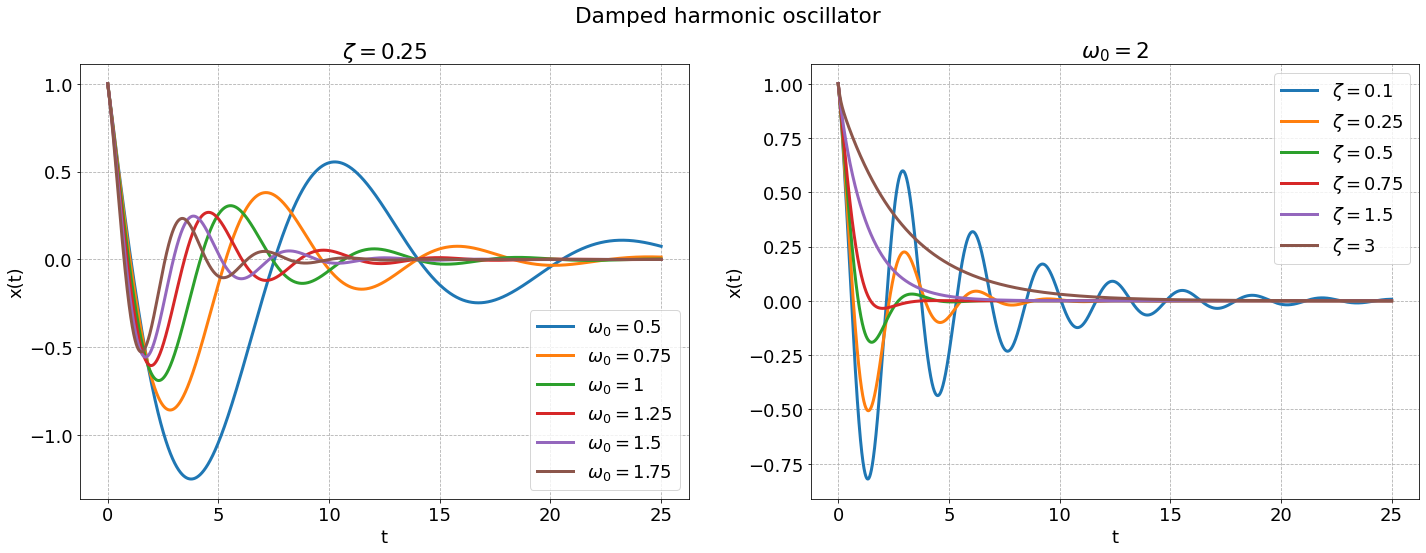

In [5]:
xx=np.linspace(0,25,10001)
fig=plt.figure(figsize=(24,8))
fig.suptitle("Damped harmonic oscillator")
ax1=plt.subplot(121)
ax1.set_title(r"$\zeta=0.25$")
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax1.grid(linestyle='--')
ax2=plt.subplot(122)
ax2.set_title(r"$\omega_0=2$")
ax2.set_xlabel("t")
ax2.set_ylabel("x(t)")
ax2.grid(linestyle='--')
for i,j in zip([0.5,0.75,1,1.25,1.5,1.75],[0.1,0.25,0.5,0.75,1.5,3]):
    dampedz=sp.lambdify(t,dampedsol.rhs.subs({x0:1,v0:-1,w0:i,z:0.25}))
    dampedw=sp.lambdify(t,dampedsol.rhs.subs({x0:1,v0:-1,w0:2,z:j}))
    ax1.plot(xx,dampedz(xx).real,lw=3,label=r"$\omega_0=$"+str(i))
    ax2.plot(xx,dampedw(xx).real,lw=3,label=r"$\zeta=$"+str(j))
ax1.legend()
ax2.legend()

Driven - $\zeta=0, F(t)=A\cos\left(\omega t\right)$

In [6]:
driven=sp.Eq(sp.diff(x(t),t,2)+w0**2*x(t),A*sp.cos(w*t))
driven

             2                   
  2         d                    
ω₀ ⋅x(t) + ───(x(t)) = A⋅cos(ω⋅t)
             2                   
           dt                    

In [7]:
drivensol=sp.dsolve(driven,x(t),ics={x(0):x0,sp.diff(x(t),t).subs(t,0):v0})
drivensol

                      ⎛     2        2   ⎞                         
         A⋅cos(ω⋅t)   ⎝A + ω ⋅x₀ - ω₀ ⋅x₀⎠⋅cos(ω₀⋅t)   v₀⋅sin(ω₀⋅t)
x(t) = - ────────── + ────────────────────────────── + ────────────
           2     2                2     2                   ω₀     
          ω  - ω₀                ω  - ω₀                           

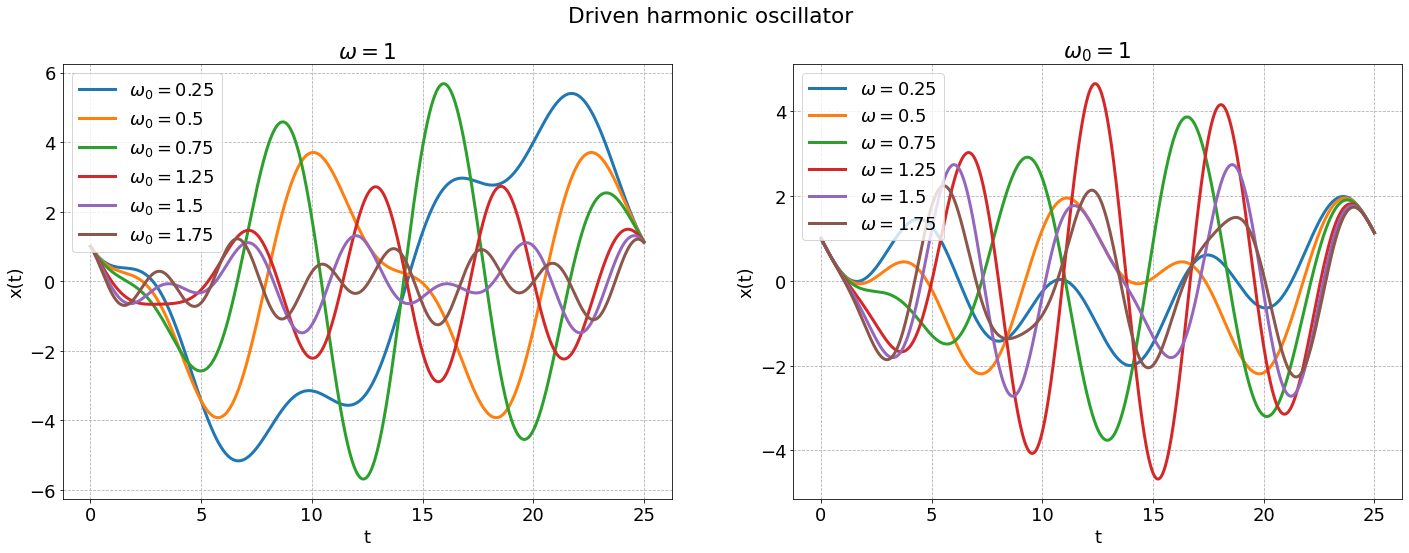

In [8]:
xx=np.linspace(0,25,10001)
fig=plt.figure(figsize=(24,8))
fig.suptitle("Driven harmonic oscillator")
ax1=plt.subplot(121)
ax1.set_title(r"$\omega=1$")
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax1.grid(linestyle='--')
ax2=plt.subplot(122)
ax2.set_title(r"$\omega_0=1$")
ax2.set_xlabel("t")
ax2.set_ylabel("x(t)")
ax2.grid(linestyle='--')
for i,j in zip([0.25,0.5,0.75,1.25,1.5,1.75],[0.25,0.5,0.75,1.25,1.5,1.75]):
    drivenz=sp.lambdify(t,drivensol.rhs.subs({x0:1,v0:-1,w0:i,A:1,w:1}))
    drivenw=sp.lambdify(t,drivensol.rhs.subs({x0:1,v0:-1,w0:1,A:1,w:j}))
    ax1.plot(xx,drivenz(xx).real,lw=3,label=r"$\omega_0=$"+str(i))
    ax2.plot(xx,drivenw(xx).real,lw=3,label=r"$\omega=$"+str(j))
ax1.legend()
ax2.legend()

Damped and driven - $\zeta\neq0, F(t)=A\cos\left(\omega t\right)$

In [9]:
dampeddriven=sp.Eq(sp.diff(x(t),t,2)+2*z*w0*sp.diff(x(t),t)+w0**2*x(t),A*sp.cos(w*t))
dampeddriven

                               2                   
  2               d           d                    
ω₀ ⋅x(t) + 2⋅ω₀⋅ζ⋅──(x(t)) + ───(x(t)) = A⋅cos(ω⋅t)
                  dt           2                   
                             dt                    

In [10]:
dampeddrivensol=sp.dsolve(dampeddriven,x(t),ics={x(0):x0,sp.diff(x(t),t).subs(t,0):v0})
dampeddrivensol

                                                                              
                      2                                                       
                   A⋅ω ⋅cos(ω⋅t)                    2⋅A⋅ω⋅ω₀⋅ζ⋅sin(ω⋅t)       
x(t) = - ───────────────────────────────── + ─────────────────────────────────
          4      2   2  2      2   2     4    4      2   2  2      2   2     4
         ω  + 4⋅ω ⋅ω₀ ⋅ζ  - 2⋅ω ⋅ω₀  + ω₀    ω  + 4⋅ω ⋅ω₀ ⋅ζ  - 2⋅ω ⋅ω₀  + ω₀ 
                                                                              

                                       ⎛                                      
                 2                     ⎜                                      
             A⋅ω₀ ⋅cos(ω⋅t)            ⎜                                      
 + ───────────────────────────────── + ⎜- ────────────────────────────────────
    4      2   2  2      2   2     4   ⎜             ________                 
   ω  + 4⋅ω ⋅ω₀ ⋅ζ  - 2⋅ω ⋅ω₀  + ω₀    ⎜     4     

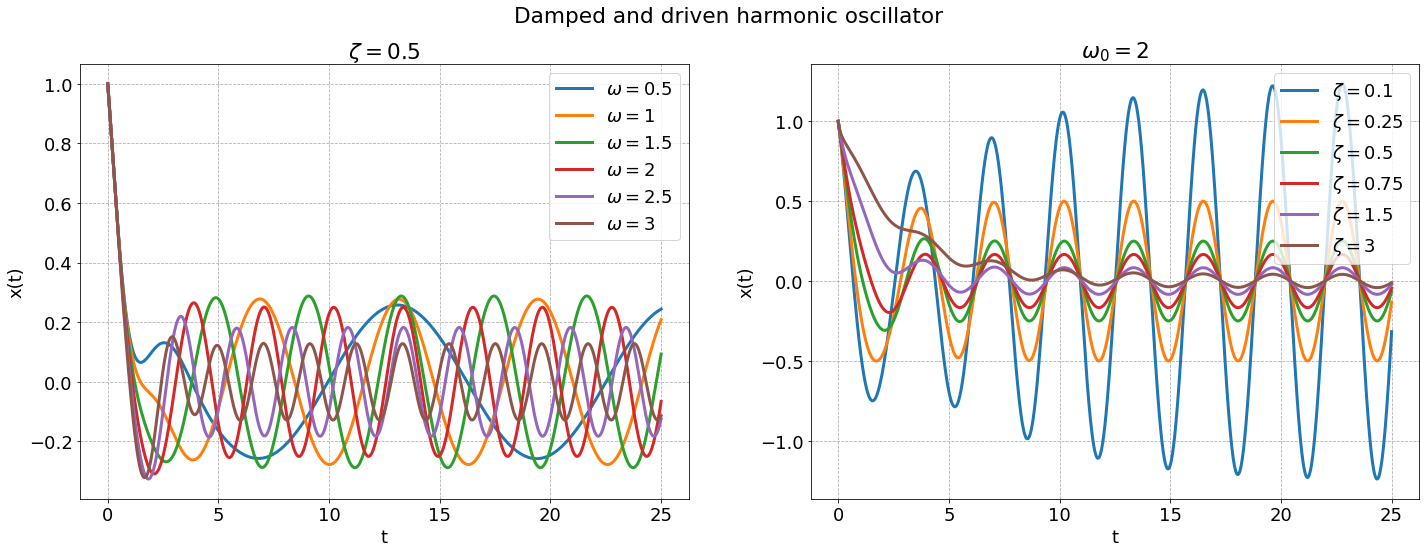

In [11]:
xx=np.linspace(0,25,10001)
fig=plt.figure(figsize=(24,8))
fig.suptitle("Damped and driven harmonic oscillator")
ax1=plt.subplot(121)
ax1.set_title(r"$\zeta=0.5$")
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax1.grid(linestyle='--')
ax2=plt.subplot(122)
ax2.set_title(r"$\omega_0=2$")
ax2.set_xlabel("t")
ax2.set_ylabel("x(t)")
ax2.grid(linestyle='--')
for i,j in zip([0.5,1,1.5,2,2.5,3],[0.1,0.25,0.5,0.75,1.5,3]):
    dampeddrivenz=sp.lambdify(t,dampeddrivensol.rhs.subs({x0:1,v0:-1,w0:2,z:0.5,A:1,w:i}))
    dampeddrivenw=sp.lambdify(t,dampeddrivensol.rhs.subs({x0:1,v0:-1,w0:2,z:j,A:1,w:2}))
    ax1.plot(xx,dampeddrivenz(xx).real,lw=3,label=r"$\omega=$"+str(i))
    ax2.plot(xx,dampeddrivenw(xx).real,lw=3,label=r"$\zeta=$"+str(j))
ax1.legend()
ax2.legend()